In [99]:
from ipywidgets import widgets as wg
from ipywidgets import HBox, VBox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy as cpy
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from scipy import stats
from IPython.display import clear_output
%matplotlib notebook

In [2]:
def set_up_map(ax, x0, x1, y0, y1):
    """
    Adds coastline, etc.
    
    x0, x1: longitude bounds to zoom into
    y0, y1: latitude bounds to zoom into
    """
    
    # set up land overlay
    ax.add_feature(cfeature.LAND, facecolor='green')
    
    # set up ocean overlay
    ax.add_feature(cfeature.OCEAN)
    
    # zoom in on region of interest
    ax.set_extent([x0, x1, y0, y1])
    
    # set nicer looking ticks
    ax.set_xticks(np.arange(x0, x1, 10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(y0, y1, 10), crs=ccrs.PlateCarree())
    lat_lon_formatter(ax)
def lat_lon_formatter(ax):
    """
    Creates nice latitude/longitude labels
    for maps
    """
    lon_formatter = cticker.LongitudeFormatter()
    lat_formatter = cticker.LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.tick_params(labelsize=16)

In [3]:
@wg.interact_manual()

def plot(x1 = (-180., 180), x2 = (-180.,180.),
         y1 = (-90.,90.), y2=(-90.,90) , grid = True):
    f, ax = plt.subplots(ncols=1, figsize=(20,10),
                     subplot_kw=dict(projection=ccrs.PlateCarree())) # this last bit is the map projection from Cartopy
    set_up_map(ax, x1, x2, y1, y2)


interactive(children=(FloatSlider(value=0.0, description='x1', max=180.0, min=-180.0), FloatSlider(value=0.0, …

In [4]:
button = wg.Button(description = 'Plot',)
button

Button(description='Plot', style=ButtonStyle())

Enter file name: Iso_data.xlsx
Enter column name for Carbon: d13Corganic (permil, VPDB)
Enter column name for Nitrogen: d15N (permil, AIR)
Enter Latitude column name: Latitude
Enter Longitude column name: Longitude


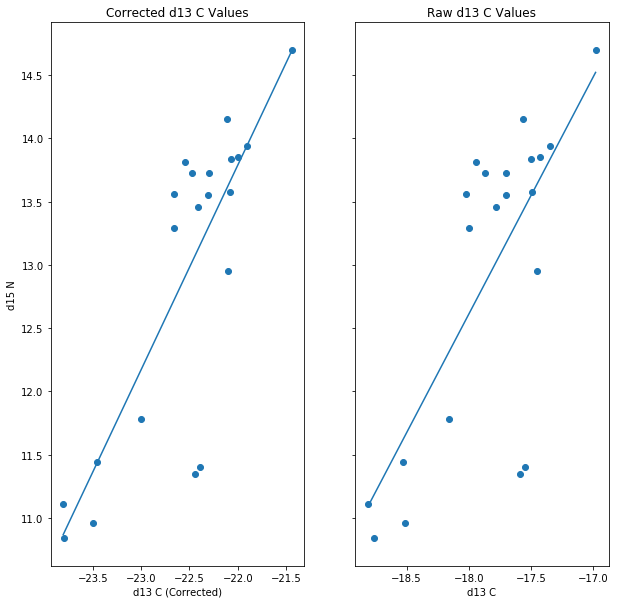

In [26]:
"""
This first part allows the user input the name of their Excel file,
the file should be exact and it should include the file extension
"""
file2 = input('Enter file name: ')
dat2 = pd.read_excel(file2)
Car = dat2[input('Enter column name for Carbon: ')]
Nit = dat2[input('Enter column name for Nitrogen: ')]
Lat = dat2[input('Enter Latitude column name: ')]
Lon = dat2[input('Enter Longitude column name: ')]

# This corrects the data and adds a new column to the excel sheet with the corrected carbon values
Corr = dat2['Corrected'] = Car - 3.32 + 0.99 * (Car/Nit)

fig, ax = plt.subplots(figsize = (10,10), ncols = 2, sharey = True)


# plot and titles for the scatter plot for corrected Carbon values
ax[0].scatter(Corr, Nit)
ax[0].set_title('Corrected d13 C Values')
ax[0].set(xlabel = 'd13 C (Corrected)')
ax[0].plot(np.unique(Corr), np.poly1d(np.polyfit(Corr, Nit, 1))(np.unique(Corr)))
# plots share y label
ax[0].set(ylabel = 'd15 N')

ax[1].scatter(Car, Nit)
ax[1].set(xlabel = 'd13 C')
ax[1].set_title('Raw d13 C Values')
ax[1].plot(np.unique(Car), np.poly1d(np.polyfit(Car, Nit, 1))(np.unique(Car)))



In [74]:
def plotcorr():
    fig, ax = plt.subplots(figsize = (10,10), ncols = 2, sharey = True)


# plot and titles for the scatter plot for corrected Carbon values
    ax[0].scatter(Corr, Nit)
    ax[0].set_title('Corrected d13 C Values')
    ax[0].set(xlabel = 'd13 C (Corrected)')
    ax[0].plot(np.unique(Corr), np.poly1d(np.polyfit(Corr, Nit, 1))(np.unique(Corr)))
# plots share y label
    ax[0].set(ylabel = 'd15 N')

    ax[1].scatter(Car, Nit)
    ax[1].set(xlabel = 'd13 C')
    ax[1].set_title('Raw d13 C Values')
    ax[1].plot(np.unique(Car), np.poly1d(np.polyfit(Car, Nit, 1))(np.unique(Car)))



In [15]:
button = wg.Button(description = 'Plot')


In [11]:
isoplt = plot2()

NameError: name 'plot2' is not defined

In [8]:
out = wg.Output()
out2 = wg.Output()

In [9]:
tab1 = VBox

In [14]:
tab = wg.Tab(children = [out, out2])
tab.set_title(0, 'Map')

display(tab)
with out:
    fig, ax = plt.subplots(figsize = (10,10), ncols = 2, sharey = True)


# plot and titles for the scatter plot for corrected Carbon values
    ax[0].scatter(Corr, Nit)
    ax[0].set_title('Corrected d13 C Values')
    ax[0].set(xlabel = 'd13 C (Corrected)')
    ax[0].plot(np.unique(Corr), np.poly1d(np.polyfit(Corr, Nit, 1))(np.unique(Corr)))
# plots share y label
    ax[0].set(ylabel = 'd15 N')

    ax[1].scatter(Car, Nit)
    ax[1].set(xlabel = 'd13 C')
    ax[1].set_title('Raw d13 C Values')
    ax[1].plot(np.unique(Car), np.poly1d(np.polyfit(Car, Nit, 1))(np.unique(Car)))
with out2:
    @wg.interact_manual()

    def plot(x1 = (-180., 180), x2 = (-180.,180.),
             y1 = (-90.,90.), y2=(-90.,90) , grid = True):
        f, ax = plt.subplots(ncols=1, figsize=(20,10),
                         subplot_kw=dict(projection=ccrs.PlateCarree())) # this last bit is the map projection from Cartopy
        set_up_map(ax, x1, x2, y1, y2)


In [15]:
with out:
    plot2()

In [16]:
plot_on_click

In [59]:
x1_slider = wg.FloatSlider(value = 0., min =-180., max = 180.0,step = 0.01,
                           description = 'x1',readout_format = '.1f',)

x2_slider = wg.FloatSlider(value = 0.,min =-180., max = 180.0, step = 0.01,
    description = 'x2', readout_format = '.1f',)

y1_slider = wg.FloatSlider(value = 0., min =-90., max = 90.0, step = 0.01,
    description = 'y1', readout_format = '.1f',)  
y2_slider = wg.FloatSlider(value = 0., min =-90., max = 90.0, step = 0.01,
    description = 'y2', readout_format = '.1f',)

In [82]:
def plot2(b=None):
    x1= x1_slider.value
    x2 = x2_slider.value
    y1 = y1_slider.value
    y2 = y2_slider.value
    f, ax = plt.subplots(ncols=1, figsize=(10,10),
                     subplot_kw=dict(projection=ccrs.PlateCarree())) # this last bit is the map projection from Cartopy
    set_up_map(ax, x1, x2, y1, y2)
    ax.scatter(Lat,Lon)
    

In [96]:
@button.on_click
def plot_on_click(b):
    plot2()
    ax.clear()
    

In [114]:
tab1 = VBox(children = [x1_slider, x2_slider, y1_slider, y2_slider])
tab2 = wg.Output()


In [117]:
data = [Car, Corr]

<IPython.core.display.Javascript object>


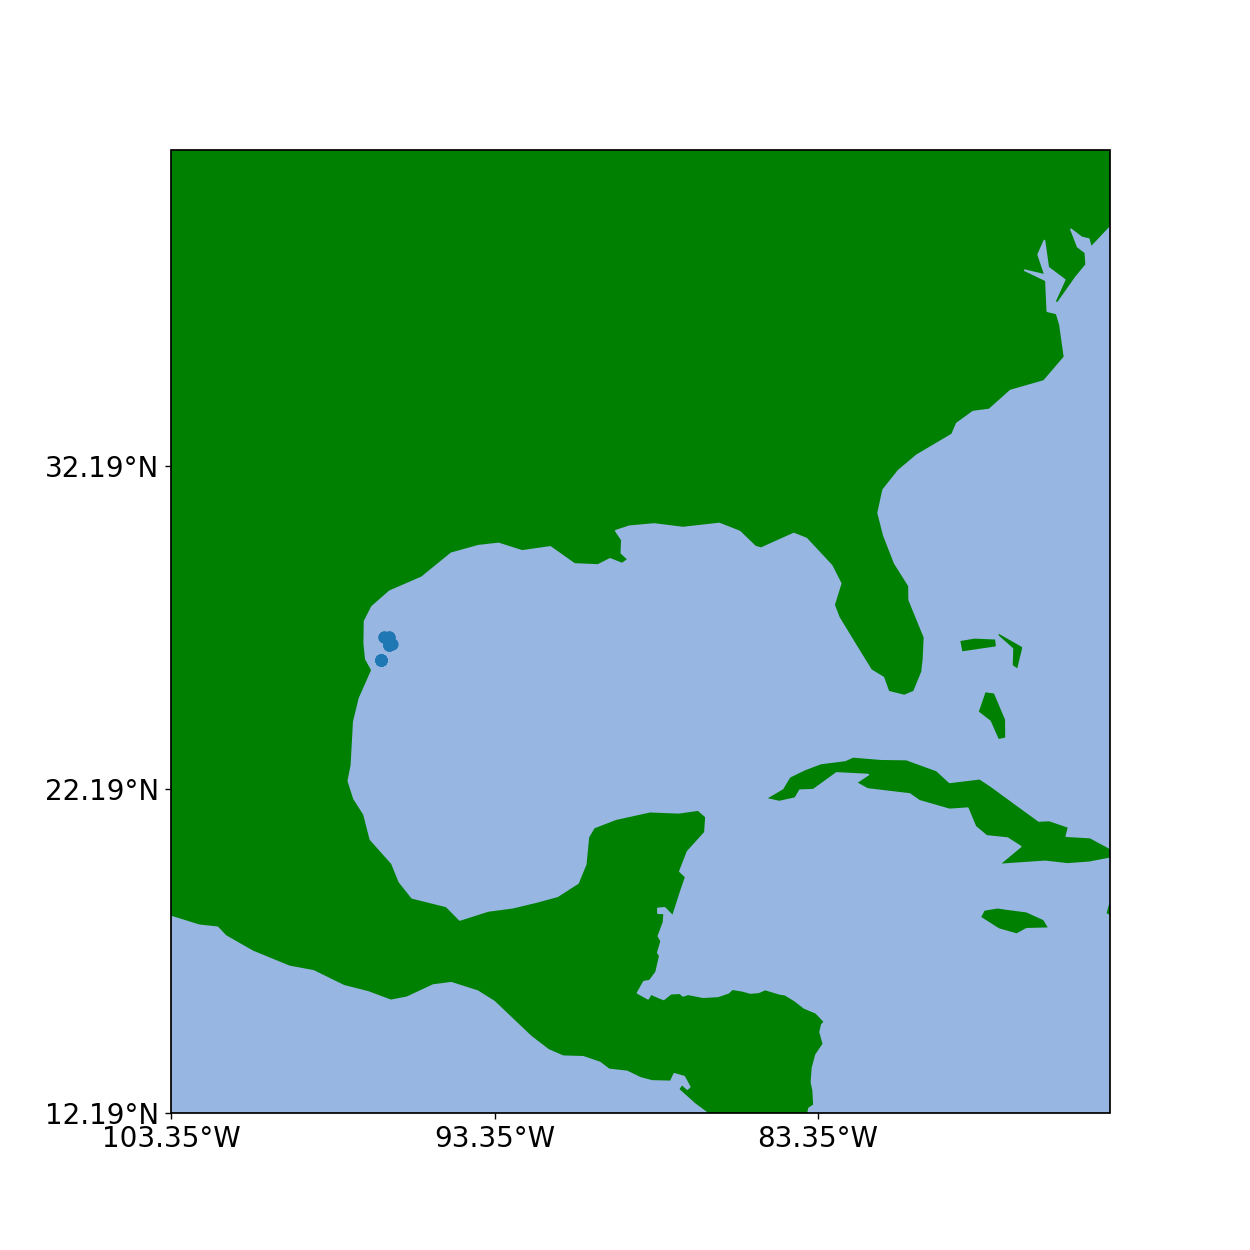

<IPython.core.display.Javascript object>


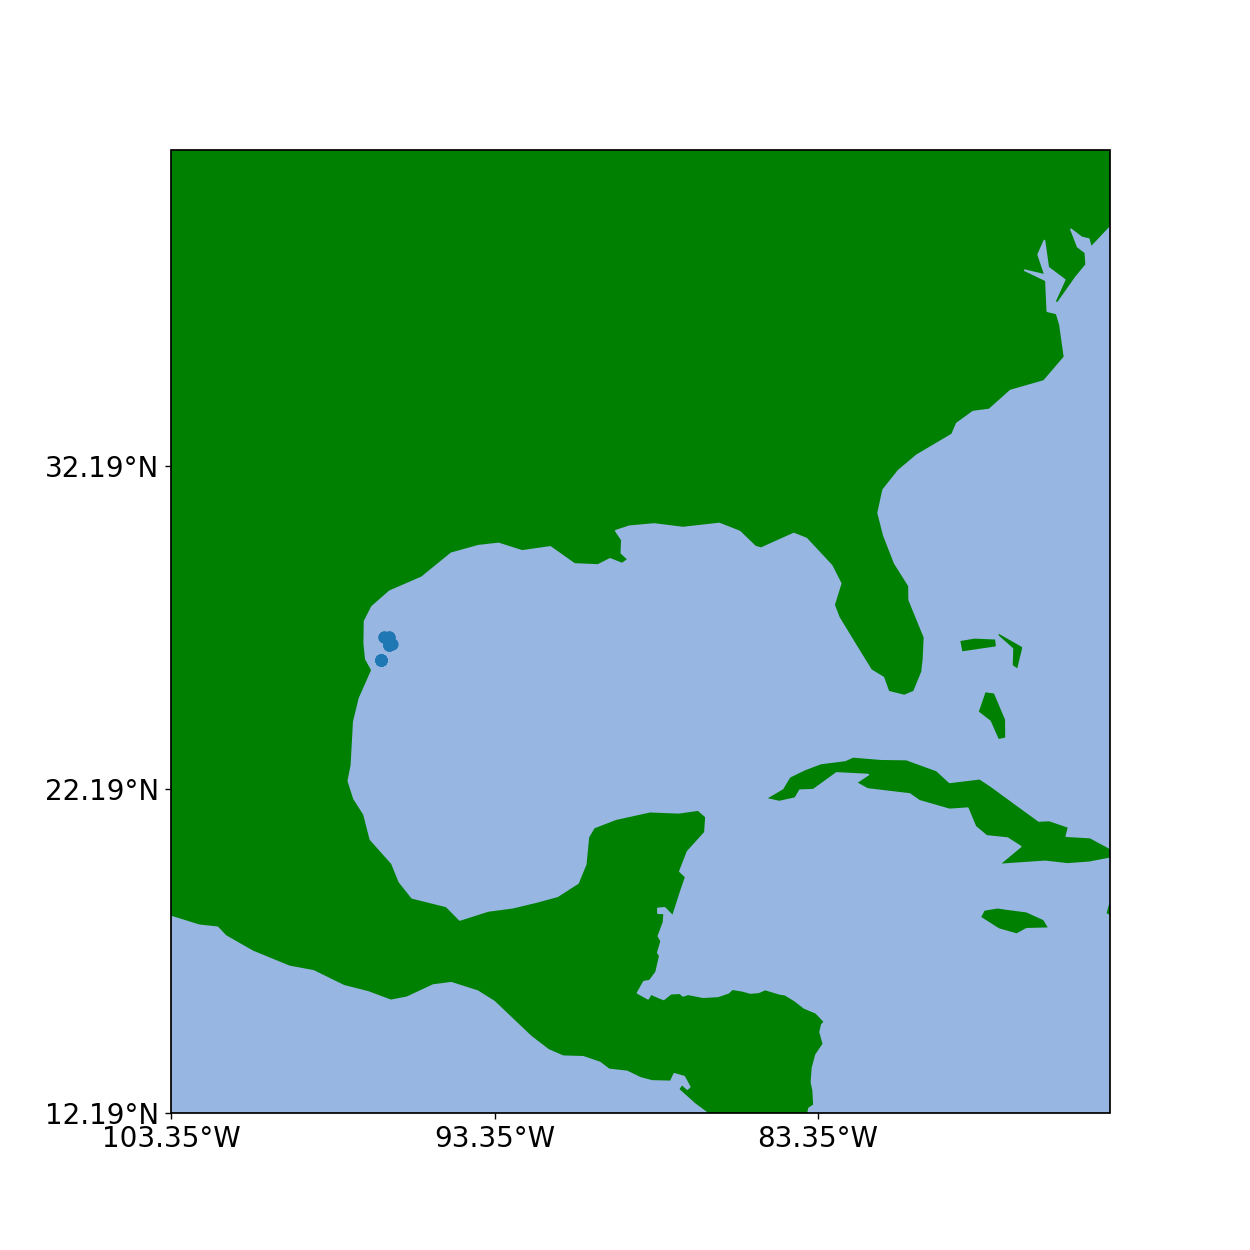

<IPython.core.display.Javascript object>


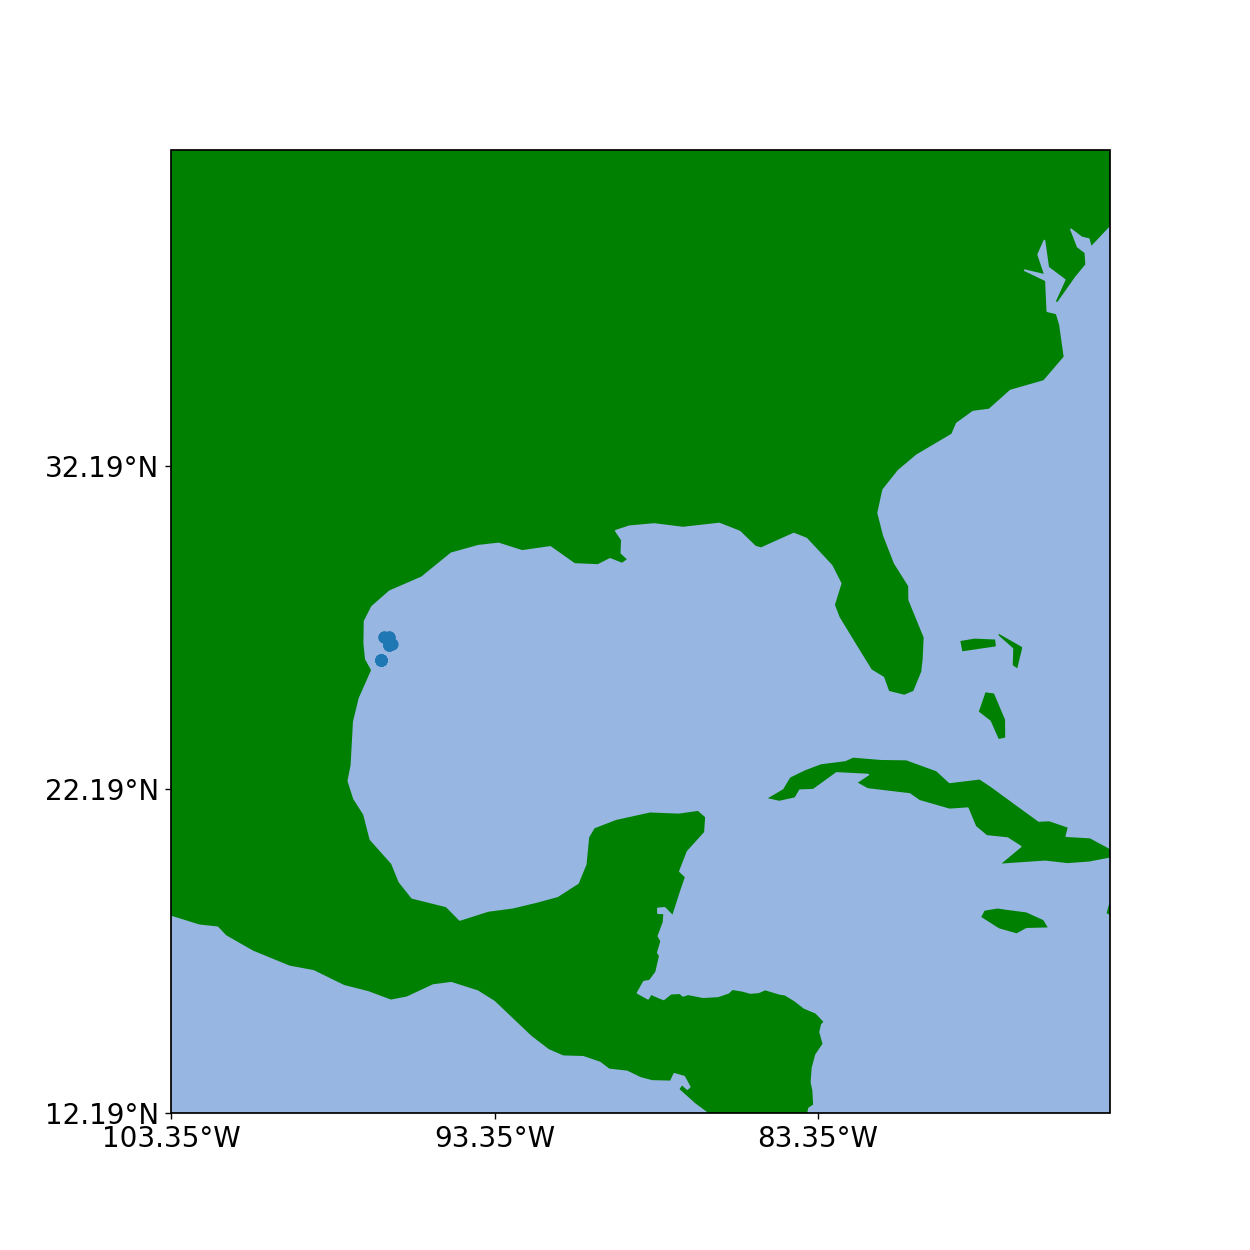

<IPython.core.display.Javascript object>


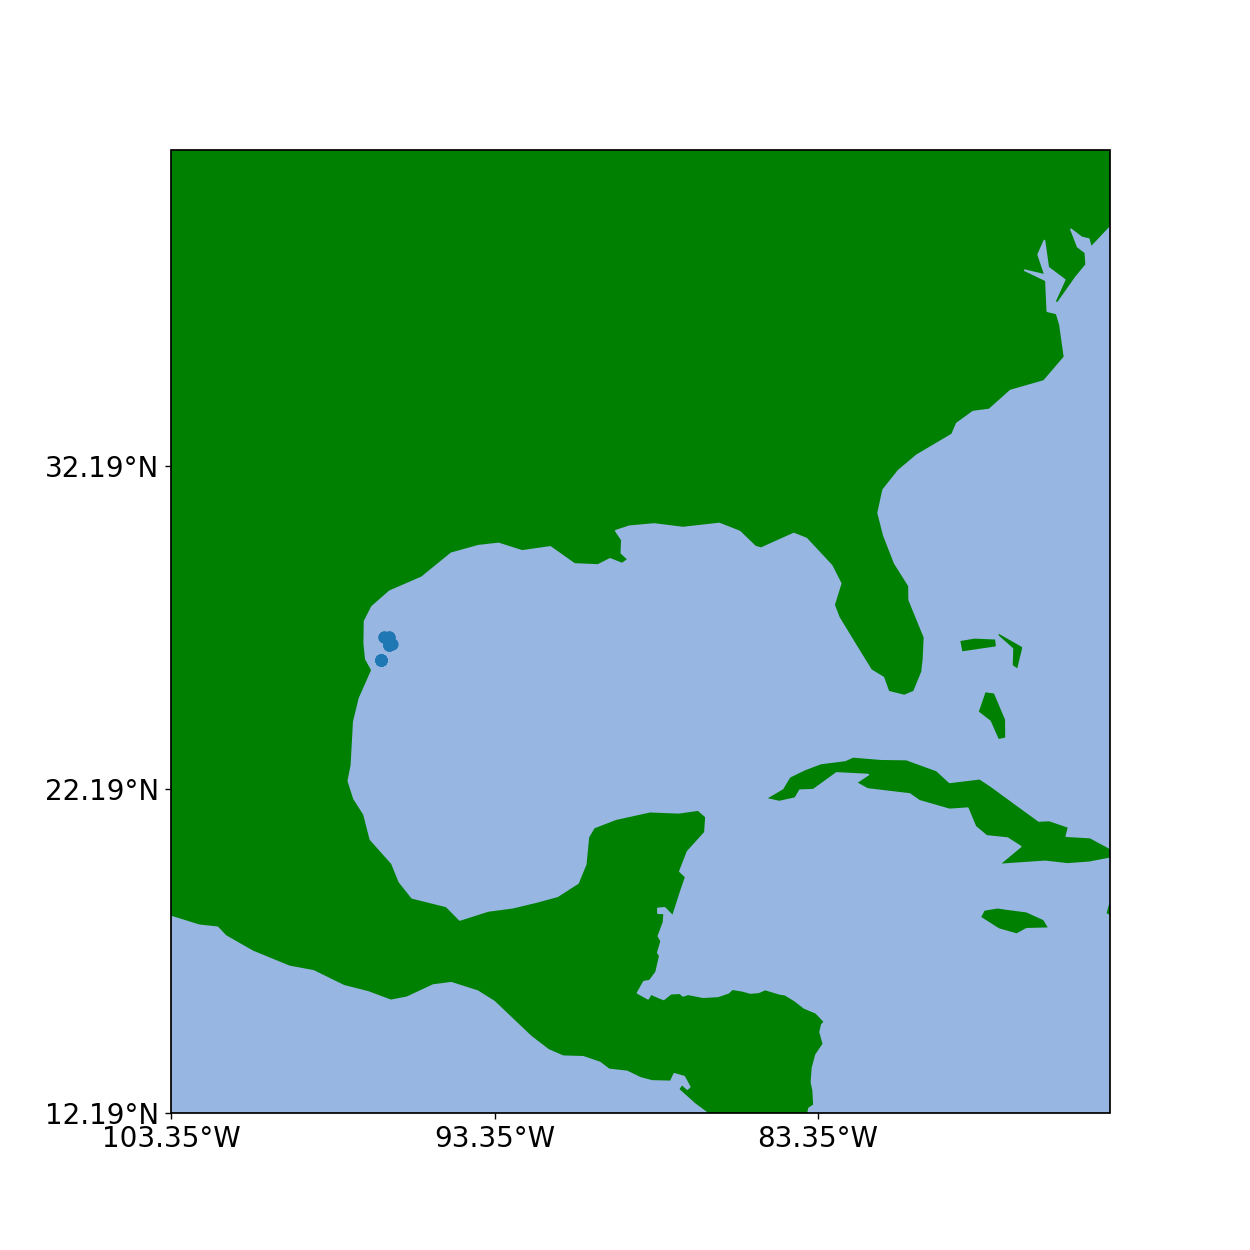

AttributeError: 'numpy.ndarray' object has no attribute 'clear'

In [116]:
%matplotlib notebook
tabex = wg.Tab(children =[tab1, tab2])
tabex.set_title(0, 'Map')
tabex.set_title(1, 'Plot')
tabex.set_title(2, 'New Table')
    
    
with tab2: 
    clear_output()
    fig, ax = plt.subplots(figsize = (6,6), nrows = 1, ncols = 2, sharey = True)


# plot and titles for the scatter plot for corrected Carbon values
    ax[0].scatter(Corr, Nit)
    ax[0].set_title('Corrected d13 C Values')
    ax[0].set(xlabel = 'd13 C (Corrected)')
    ax[0].plot(np.unique(Corr), np.poly1d(np.polyfit(Corr, Nit, 1))(np.unique(Corr)))
# plots share y label
    ax[0].set(ylabel = 'd15 N')

    ax[1].scatter(Car, Nit)
    ax[1].set(xlabel = 'd13 C')
    ax[1].set_title('Raw d13 C Values')
    ax[1].plot(np.unique(Car), np.poly1d(np.polyfit(Car, Nit, 1))(np.unique(Car)))
    plt.show(fig)
    

    

VBox(children = [tabex, button])


<IPython.core.display.Javascript object>


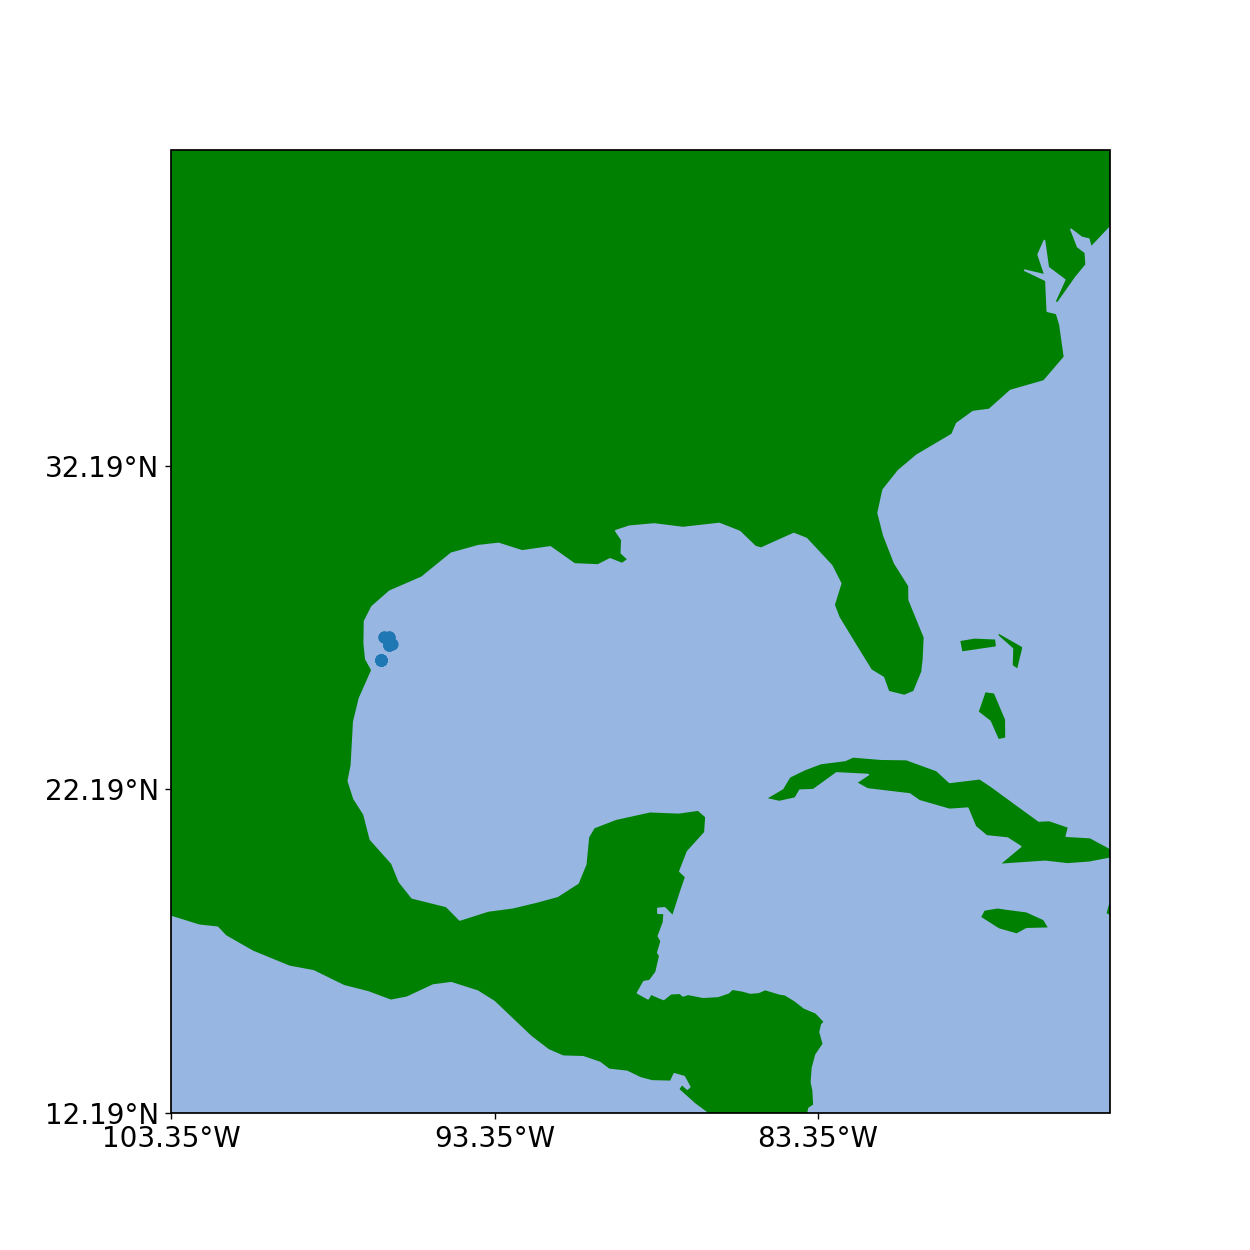

<IPython.core.display.Javascript object>


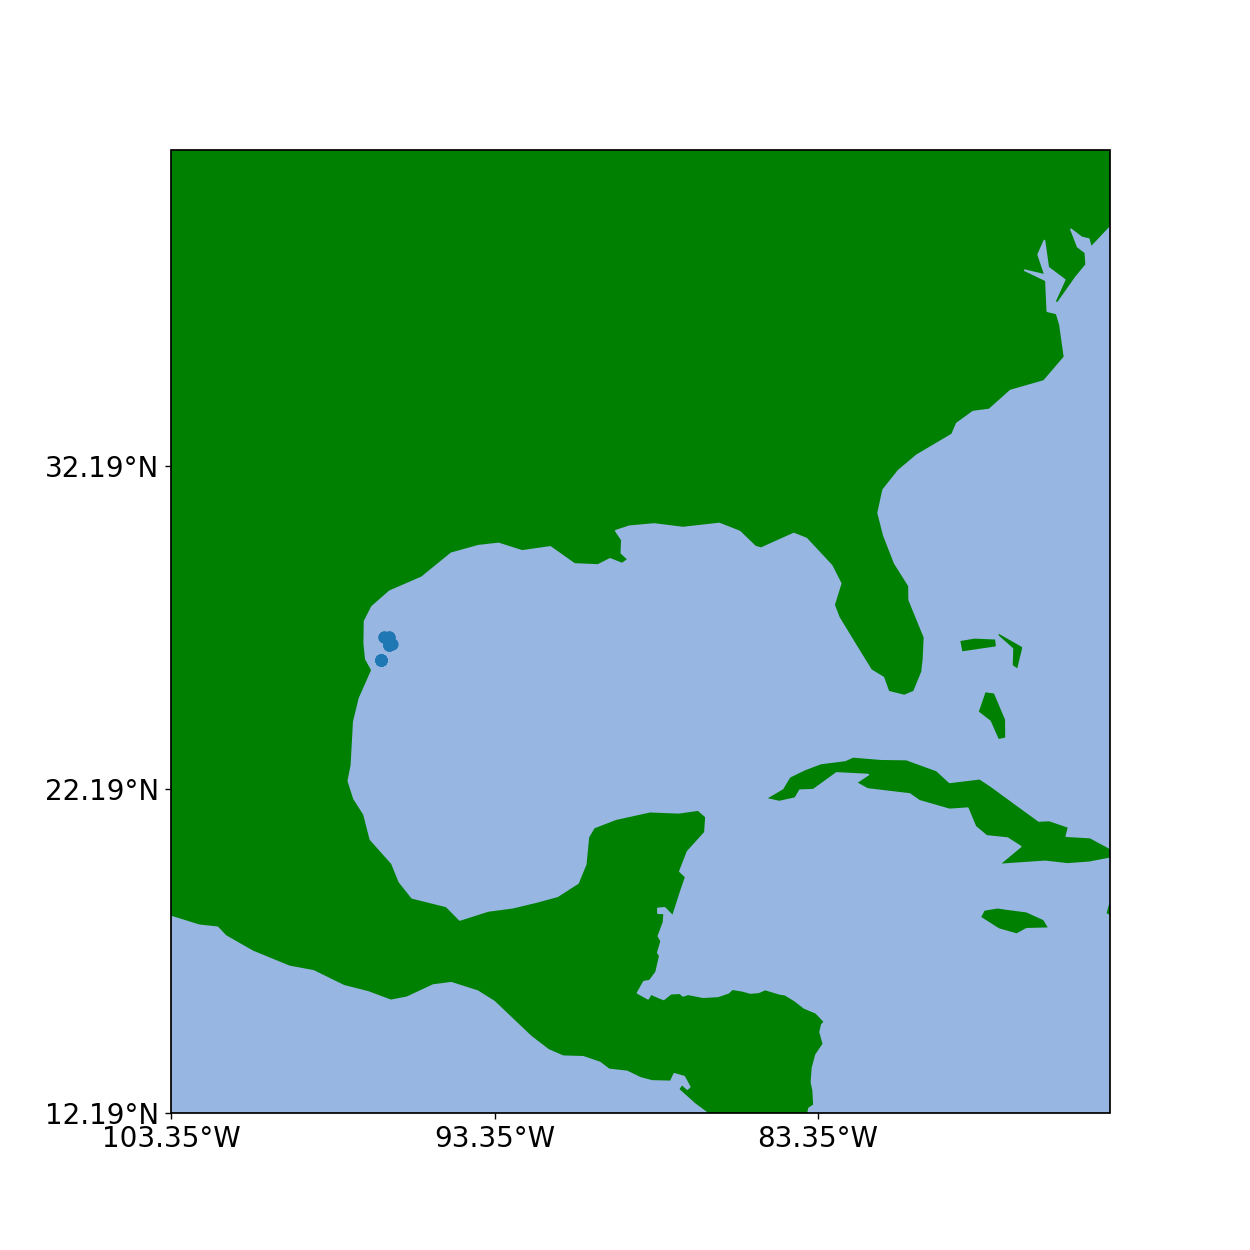

<IPython.core.display.Javascript object>


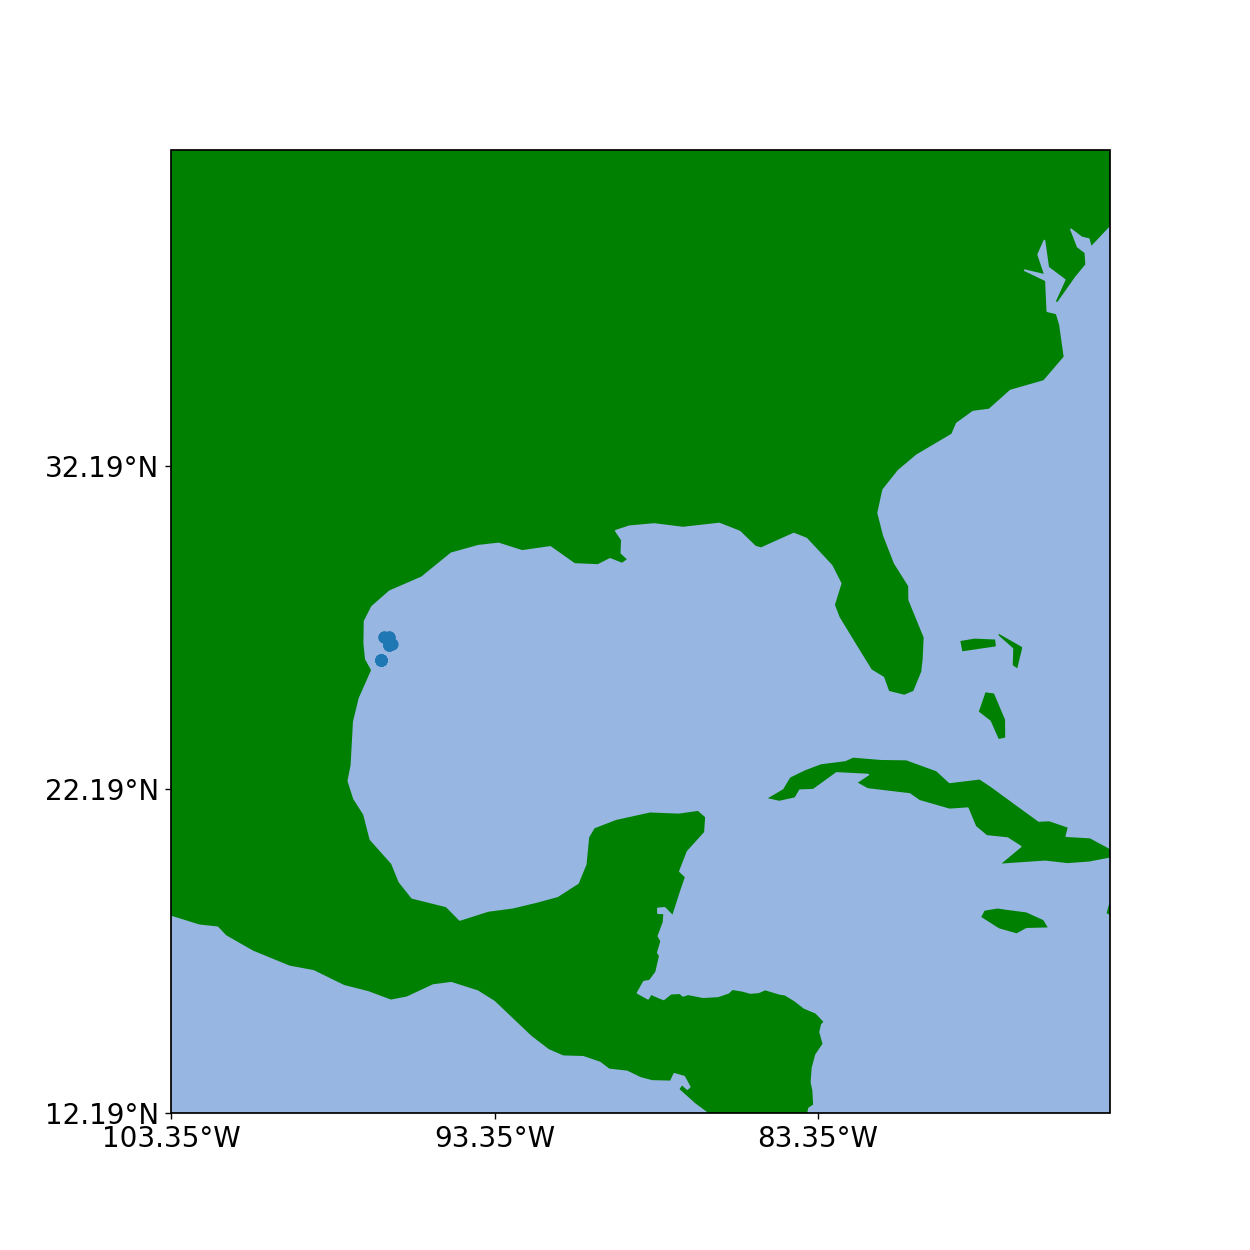

<IPython.core.display.Javascript object>


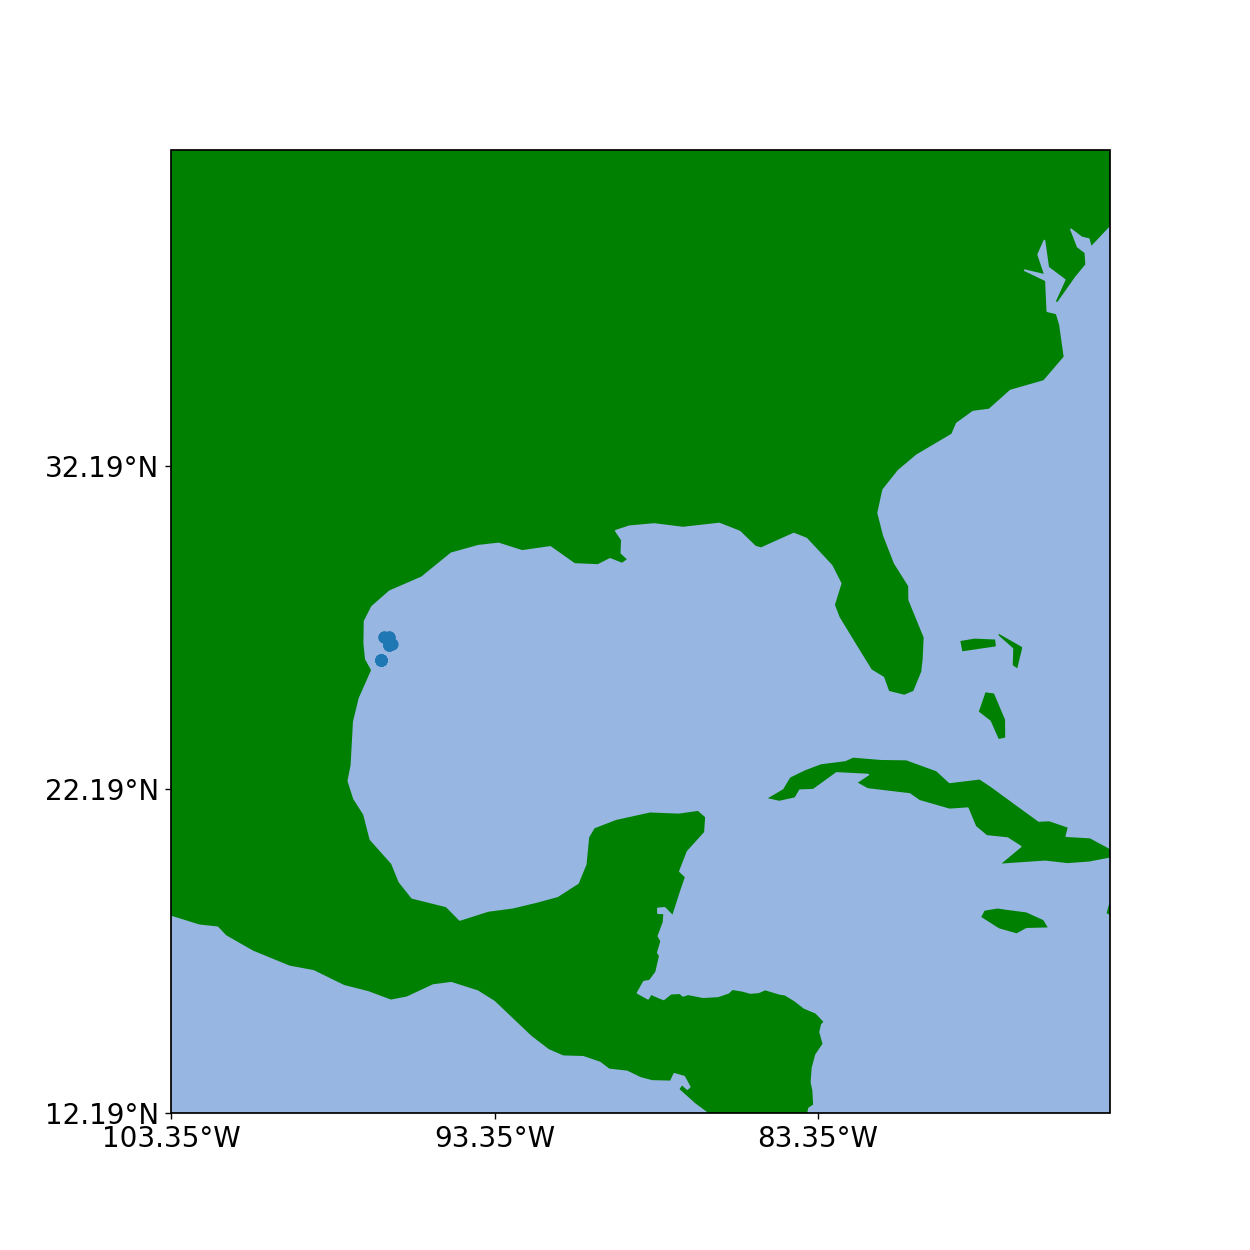

In [118]:
%matplotlib notebook
tabex = wg.Tab(children =[tab1, tab2])
tabex.set_title(0, 'Map')
tabex.set_title(1, 'Plot')


    
with tab2: 
    fig, ax = plt.subplots()
    ax.set_title('Raw vs Corrected d13 C')
    ax.set_ylabel('d13 Carbon')

    ax.yaxis.grid(True, linestyle ='-', which = 'major', color = 'lightgrey',
                 alpha = 0.5)
    ax.boxplot(data)
    plt.show(fig)

    

VBox(children = [tabex, button])


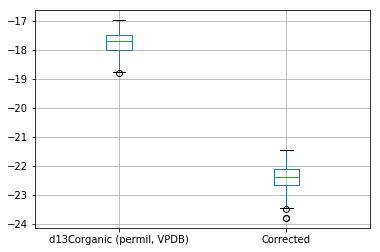

In [56]:
dat2[['d13Corganic (permil, VPDB)', 'Corrected']].boxplot()

In [64]:
data = [Car, Corr]

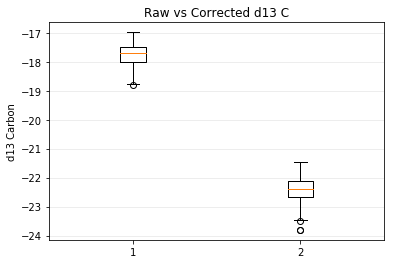

In [72]:
fig, ax = plt.subplots()
ax.set_title('Raw vs Corrected d13 C')
ax.set_ylabel('d13 Carbon')

ax.yaxis.grid(True, linestyle ='-', which = 'major', color = 'lightgrey',
             alpha = 0.5)
ax.boxplot(data)
plt.show()